# 1.3 Optimization in Relation to Problem-Solving

Objective: ClimateWins wants you to use a gradient descent function on the temperature data to see how well it works and whether it can be incorporated into larger machine learning functions.

### This script contains the following:

##[Import Libraries](#import)
##[Import Data](#import_data)

### [Basel 1960 Weather Station](#basel1)
### [Basel 1970 Weather Station](#basel2)
### [Basel 2000 Weather Station](#basel3)


### [Budapest 1960 Weather Station](#buda1)
### [Budapest 1970 Weather Station](#buda1)
### [Budapest 2000 Weather Station](#buda3)


### [Heathrow 1960 Weather Station](#heathrow1)
### [Heathrow 1970 Weather Station](#heathrow2)
### [Heathrow 2000 Weather Station](#heathrow3)




## 1. Importing Libraries <a id='import_libraries'></a>

In [ ]:
pip install plotly==5.12.0

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

# 2. Import Data <a id='import_data'></a>

In [ ]:
#create a path to the folder
path = r'/content/drive/MyDrive/Careerfoundary/Machine_learning'

In [ ]:
#import the dataset
climate = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'DataSet_scaled.csv'), index_col = False)
climate

id      DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0     -1.731975  19600101 -1.599964           0.660514          -0.02793   
1     -1.731824  19600102 -1.599964           0.244897          -0.02793   
2     -1.731673  19600103 -1.599964           1.076130          -0.02793   
3     -1.731523  19600104 -1.599964          -1.001953          -0.02793   
4     -1.731372  19600105 -1.599964           0.244897          -0.02793   
...         ...       ...       ...                ...               ...   
22945  1.731372  20221027  1.013583          -1.833187          -0.02793   
22946  1.731523  20221028  1.013583           0.244897          -0.02793   
22947  1.731673  20221029  1.013583          -0.586336          -0.02793   
22948  1.731824  20221030  1.013583          -0.170720          -0.02793   
22949  1.731975  20221031  1.013583          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  ...  VALENTIA_cloud_cover  \
0                -0.265148         -0.179228  ...             -0.443701   
1                 1.658760         -0.179228  ...              0.783085   
2                 0.155707         -0.179228  ...              0.783085   
3                -0.445514         -0.179228  ...              0.783085   
4                -0.164944         -0.179228  ...             -1.670486   
...                    ...               ...  ...                   ...   
22945            -0.004619         -0.179228  ...             -0.443701   
22946            -0.004619         -0.179228  ...             -0.443701   
22947            -0.004619         -0.179228  ...             -0.443701   
22948            -0.004619         -0.179228  ...             -0.443701   
22949            -0.004619         -0.179228  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...                ...   
22945             

In [ ]:
#Reduce to just the mean temperatures per location
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [ ]:
df

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101 -1.599964        -0.528623           -1.016876   
1      19600102 -1.599964        -0.582946           -1.107669   
2      19600103 -1.599964        -0.257010           -1.084971   
3      19600104 -1.599964        -0.555784           -1.209812   
4      19600105 -1.599964        -1.003946           -1.209812   
...         ...       ...              ...                 ...   
22945  20221027  1.013583         0.747959            0.628750   
22946  20221028  1.013583         0.856604            0.367720   
22947  20221029  1.013583         0.856604            0.083991   
22948  20221030  1.013583         0.680055            0.265577   
22949  20221031  1.013583         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
df.shape

(22950, 20)

In [ ]:
df.dtypes

DATE                      int64
MONTH                   float64
BASEL_temp_mean         float64
BELGRADE_temp_mean      float64
BUDAPEST_temp_mean      float64
DEBILT_temp_mean        float64
DUSSELDORF_temp_mean    float64
GDANSK_temp_mean        float64
HEATHROW_temp_mean      float64
KASSEL_temp_mean        float64
LJUBLJANA_temp_mean     float64
MAASTRICHT_temp_mean    float64
MADRID_temp_mean        float64
MUNCHENB_temp_mean      float64
OSLO_temp_mean          float64
ROMA_temp_mean          float64
SONNBLICK_temp_mean     float64
STOCKHOLM_temp_mean     float64
TOURS_temp_mean         float64
VALENTIA_temp_mean      float64
dtype: object

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

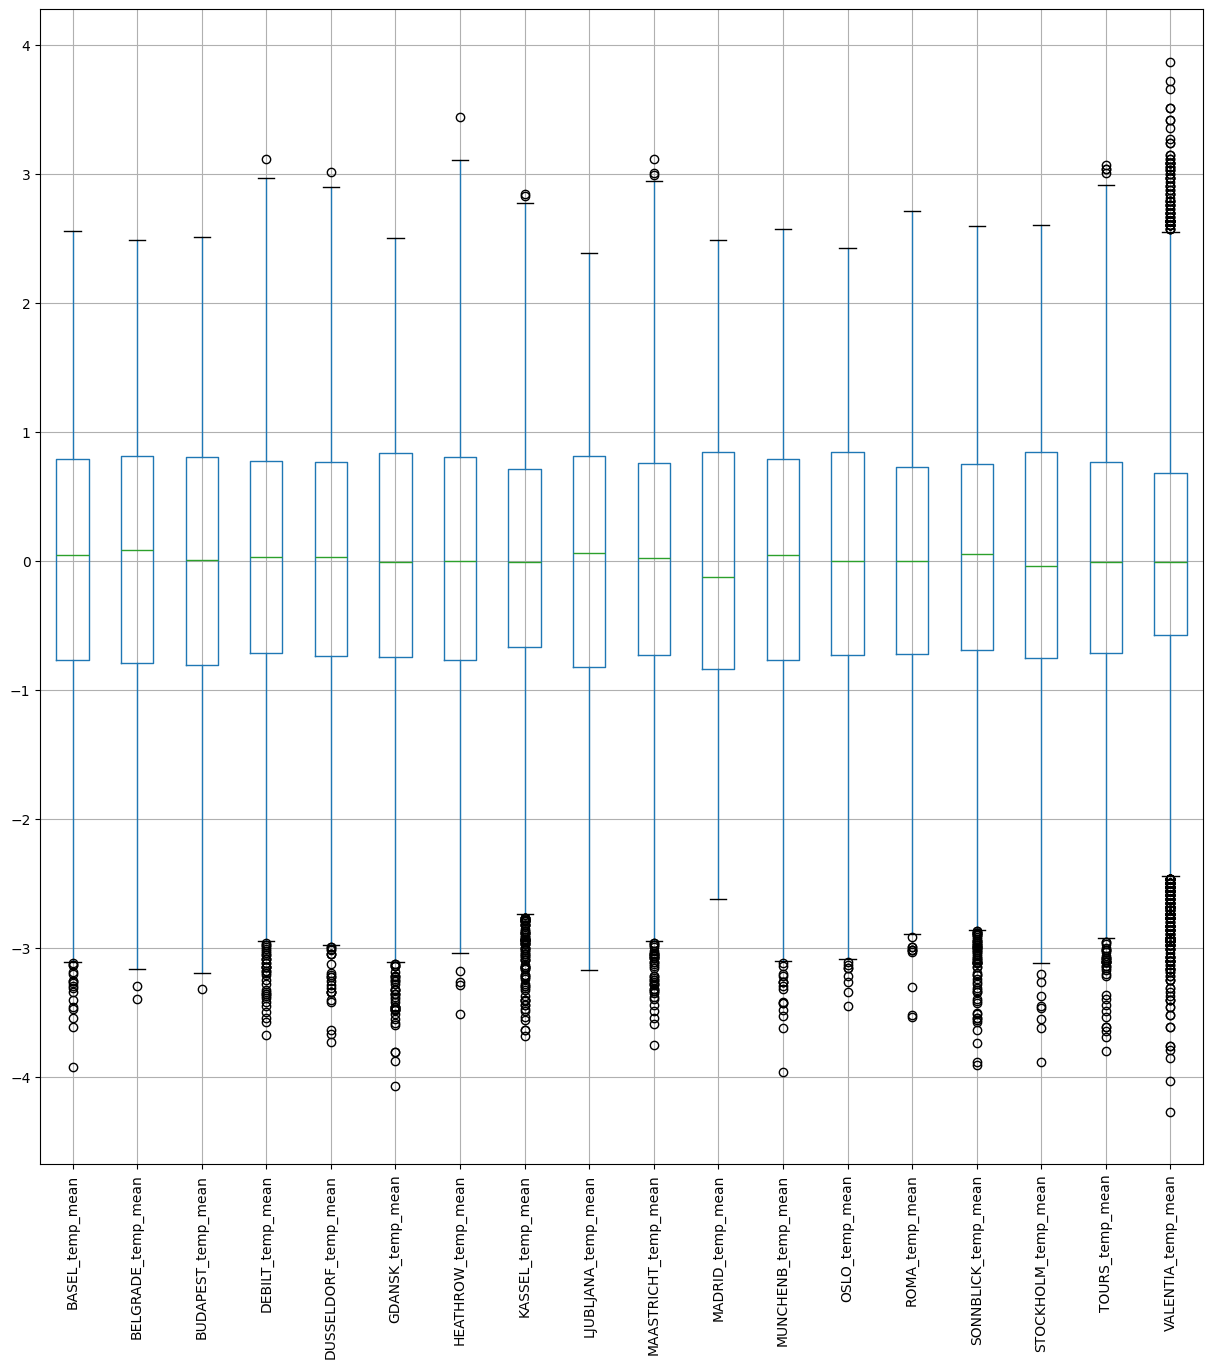

In [ ]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

# 3. Basel 1960 Weather Station<a id='basel1'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1960')]
dfyear

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [ ]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    0.001171        -0.102317           -0.032384   
std    3.457653e+02    1.003590         0.935826            0.920271   
min    1.960010e+07   -1.599964        -3.190431           -2.401472   
25%    1.960040e+07   -0.728781        -0.756099           -0.594120   
50%    1.960070e+07    0.142401        -0.053300            0.055618   
75%    1.960098e+07    0.940984         0.649499            0.662798   
max    1.960123e+07    1.594371         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [ ]:
#Plot ALL weather data for all stations for a year

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [ ]:
n_rows = dfyear.shape[0]
n_rows

366

In [ ]:
# 4. Pick a Weather Station - Basel

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows,1)

In [ ]:
X.shape, y.shape

((366, 2), (366, 1))

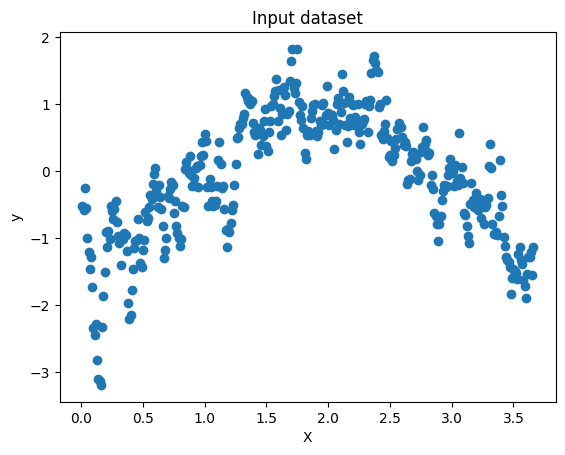

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BASEL_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].min()

-3.190431444544038

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BASEL_temp_mean'].max()

1.8208303493786089

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.44192341])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=400 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.09 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 19.8 µs


In [ ]:
theta

array([[-0.36436721],
       [ 0.14282573]])

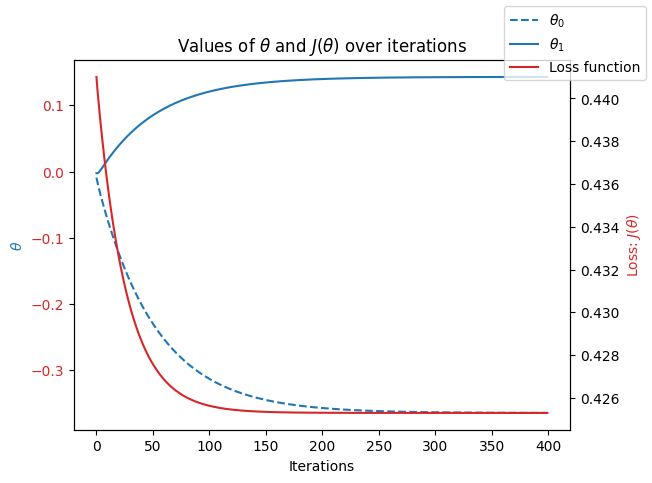

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

* The graph shows that as θ₀ and θ₁ adjust over each iteration, the loss J(θ) decreases, indicating that the model is improving.

* Eventually, all three lines level off, suggesting the optimization has reached a point where further changes are minimal, meaning the model has converged.

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(-10.02, 9.98, 100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-9.82, 10.18, 100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 5.4 s, sys: 19.2 ms, total: 5.42 s
Wall time: 10.1 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# 4. Budapest 1970 Weather Station<a id='buda2'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear2 = df[df['DATE'].astype(str).str.contains('1970')]
dfyear2

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
3653  19700101 -1.599964        -1.900269           -1.380049   
3654  19700102 -1.599964        -1.968172           -1.629730   
3655  19700103 -1.599964        -1.710140           -1.300605   
3656  19700104 -1.599964        -1.520011           -0.926083   
3657  19700105 -1.599964        -1.112591           -0.449419   
...        ...       ...              ...                 ...   
4013  19701227  1.594371        -2.348431           -1.221161   
4014  19701228  1.594371        -2.063237           -0.744497   
4015  19701229  1.594371        -1.968172           -0.267832   
4016  19701230  1.594371        -1.669398           -0.256483   
4017  19701231  1.594371        -2.199044           -0.528863   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
3653           -1.416775         -3.088935             -2.889169   
3654           -1.581463         -1.490890             -1.666859   
3655           -1.934365         -1.617468             -1.475413   
3656           -1.734387         -2.171246             -2.079204   
3657           -1.052110         -1.981379             -1.902485   
...                  ...               ...                   ...   
4013           -2.204923         -2.598446             -2.491550   
4014           -1.216797         -2.044668             -1.902485   
4015           -1.287378         -2.013024             -1.902485   
4016           -0.934476         -1.981379             -2.108658   
4017           -1.216797         -2.361113             -2.491550   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
3653         -3.357388           -1.923481         -2.678447   
3654         -1.809997           -1.626469         -1.895821   
3655         -1.451923           -1.643941         -1.526658   
3656         -1.541442           -2.272906         -1.940121   
3657         -1.464712           -2.430148         -1.733389   
...                ...                 ...               ...   
4013         -1.490288           -2.133136         -2.205918   
4014         -1.298463           -1.906010         -1.689090   
4015         -1.196156           -1.678883         -1.733389   
4016         -1.068273           -1.661412         -1.792455   
4017         -1.937881           -1.958424         -2.560315   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
3653            -1.455587             -2.842642         -1.392653   
3654            -1.673549             -1.792429         -1.810505   
3655            -1.431369             -1.387347         -1.500486   
3656            -1.043881             -1.987469         -0.637824   
3657            -1.019663             -1.852441         -0.732178   
...                   ...                   ...               ...   
4013            -1.782530             -2.422557         -2.107045   
4014            -1.649331             -2.152502         -1.864421   
4015            -1.358715             -2.047481         -2.012691   
4016            -0.971227             -2.137499         -2.053129   
4017            -1.286061             -2.602594         -1.864421   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
3653           -1.798962       -1.254442       -1.179421            -1.528340   
3654           -1.685856       -1.654892       -1.566700            -1.791591   
3655           -1.283700       -1.909724       -1.246774            -1.221213   
3656           -1.459643       -2.358713       -1.027877            -1.060337   
3657           -1.283700       -2.492197       -0.253319            -0.621584   
...                  ...             ...             ...                  ...   
4013           -2.377061       -1.072419       -0.758466            -1.367464   
4014           -1.899501       -0.999610       -0.674275            -1.074962   
4015           -1.635586       -1.400060       -0.371187            -1.118837   
4016

In [ ]:
dfyear2.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   1.970067e+07    0.004762        -0.133779           -0.109784   
std    3.454755e+02    1.002610         1.017559            0.924237   
min    1.970010e+07   -1.599964        -2.348431           -2.026950   
25%    1.970040e+07   -0.728781        -1.003946           -0.835290   
50%    1.970070e+07    0.142401        -0.161945           -0.052199   
75%    1.970100e+07    1.013583         0.652894            0.628750   
max    1.970123e+07    1.594371         1.847992            1.650173   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean            -0.113229         -0.139411             -0.135330   
std              0.996474          1.079347              1.053106   
min             -2.204923         -3.088935             -2.889169   
25%             -0.969766         -0.968756             -0.930527   
50%             -0.099274          0.028044             -0.135289   
75%              0.724164          0.724222              0.718855   
max              1.641710          2.100757              1.838079   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean          -0.172282           -0.086796         -0.045555   
std            1.079882            1.065428          1.125148   
min           -3.459695           -2.430148         -2.678447   
25%           -0.978754           -0.910147         -0.950763   
50%           -0.096358           -0.019113          0.009061   
75%            0.773250            0.802037          0.880287   
max            1.975355            2.234681          2.091142   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.121042             -0.137325         -0.085698   
std               0.991954              1.025780          1.010199   
min              -2.170018             -2.842642         -2.187919   
25%              -0.983336             -0.907249         -0.947843   
50%              -0.147815             -0.112087         -0.233451   
75%               0.699815              0.668071          0.885313   
max               1.813844              1.823306          1.788412   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean            -0.185690       -0.177366       -0.012787   
std              1.013268        1.163289        1.088088   
min             -3.017997       -2.977591       -2.358096   
25%             -1.019785       -1.036014       -0.926848   
50%             -0.165203       -0.198710       -0.185966   
75%              0.664244        0.869157        1.060061   
max              1.833009        2.167587        2.104030   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean             -0.196054            -0.222937        -0.113811   
std               1.053555             1.159896         1.025732   
min              -3.122475            -3.115559        -2.892843   
25%              -0.987211            -1.050423        -0.853451   
50%              -0.138956            -0.291548        -0.131820   
75%               0.665425             0.865426         0.699625   
max               1.908558             1.985078         1.986010   

       VALENTIA_temp_mean  
count          365.000000  
mean            -0.085068  
std              1.212600  
min             -3.011504  
25%             -0.998679  
50%              0.052797  
75%              0.954062  
max              2.426128

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear2 = dfyear2.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.66, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [ ]:
n_rows2 = dfyear2.shape[0]
n_rows2

365

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows2, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows2, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear2['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows2, 1)

In [ ]:
dfyear2.shape


(365, 20)

In [ ]:
X.shape, y.shape

((365, 2), (365, 1))

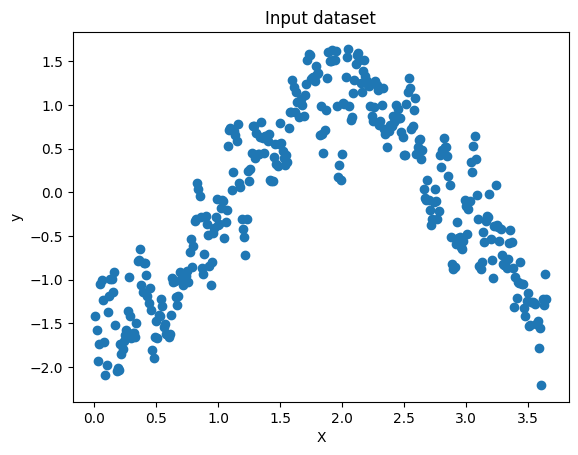

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear2['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear2

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
3653  19700101 -1.599964        -1.900269           -1.380049   
3654  19700102 -1.599964        -1.968172           -1.629730   
3655  19700103 -1.599964        -1.710140           -1.300605   
3656  19700104 -1.599964        -1.520011           -0.926083   
3657  19700105 -1.599964        -1.112591           -0.449419   
...        ...       ...              ...                 ...   
4013  19701227  1.594371        -2.348431           -1.221161   
4014  19701228  1.594371        -2.063237           -0.744497   
4015  19701229  1.594371        -1.968172           -0.267832   
4016  19701230  1.594371        -1.669398           -0.256483   
4017  19701231  1.594371        -2.199044           -0.528863   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
3653           -1.416775         -3.088935             -2.889169   
3654           -1.581463         -1.490890             -1.666859   
3655           -1.934365         -1.617468             -1.475413   
3656           -1.734387         -2.171246             -2.079204   
3657           -1.052110         -1.981379             -1.902485   
...                  ...               ...                   ...   
4013           -2.204923         -2.598446             -2.491550   
4014           -1.216797         -2.044668             -1.902485   
4015           -1.287378         -2.013024             -1.902485   
4016           -0.934476         -1.981379             -2.108658   
4017           -1.216797         -2.361113             -2.491550   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
3653         -3.357388           -1.923481         -2.678447   
3654         -1.809997           -1.626469         -1.895821   
3655         -1.451923           -1.643941         -1.526658   
3656         -1.541442           -2.272906         -1.940121   
3657         -1.464712           -2.430148         -1.733389   
...                ...                 ...               ...   
4013         -1.490288           -2.133136         -2.205918   
4014         -1.298463           -1.906010         -1.689090   
4015         -1.196156           -1.678883         -1.733389   
4016         -1.068273           -1.661412         -1.792455   
4017         -1.937881           -1.958424         -2.560315   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
3653            -1.455587             -2.842642         -1.392653   
3654            -1.673549             -1.792429         -1.810505   
3655            -1.431369             -1.387347         -1.500486   
3656            -1.043881             -1.987469         -0.637824   
3657            -1.019663             -1.852441         -0.732178   
...                   ...                   ...               ...   
4013            -1.782530             -2.422557         -2.107045   
4014            -1.649331             -2.152502         -1.864421   
4015            -1.358715             -2.047481         -2.012691   
4016            -0.971227             -2.137499         -2.053129   
4017            -1.286061             -2.602594         -1.864421   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
3653           -1.798962       -1.254442       -1.179421            -1.528340   
3654           -1.685856       -1.654892       -1.566700            -1.791591   
3655           -1.283700       -1.909724       -1.246774            -1.221213   
3656           -1.459643       -2.358713       -1.027877            -1.060337   
3657           -1.283700       -2.492197       -0.253319            -0.621584   
...                  ...             ...             ...                  ...   
4013           -2.377061       -1.072419       -0.758466            -1.367464   
4014           -1.899501       -0.999610       -0.674275            -1.074962   
4015           -1.635586       -1.400060       -0.371187            -1.118837   
4016

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear2['BUDAPEST_temp_mean'].min()

-2.204923068571174

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear2['BUDAPEST_temp_mean'].max()

1.6417097760175523

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.50153081])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=400 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
theta

array([[-0.53398608],
       [ 0.23081229]])

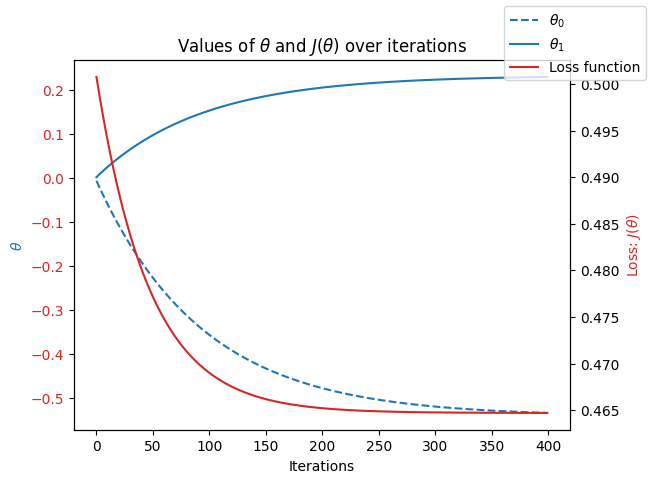

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 5.39 s, sys: 19 ms, total: 5.41 s
Wall time: 8.11 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Budapest 1960 weather Station<a id='buda1'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear3 = df[df['DATE'].astype(str).str.contains('1960')]
dfyear3

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [ ]:
dfyear3.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    0.001171        -0.102317           -0.032384   
std    3.457653e+02    1.003590         0.935826            0.920271   
min    1.960010e+07   -1.599964        -3.190431           -2.401472   
25%    1.960040e+07   -0.728781        -0.756099           -0.594120   
50%    1.960070e+07    0.142401        -0.053300            0.055618   
75%    1.960098e+07    0.940984         0.649499            0.662798   
max    1.960123e+07    1.594371         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear3 = dfyear3.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.67, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [ ]:
n_rows3 = dfyear3.shape[0]
n_rows3

366

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows3, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows3, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear2['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows2, 1)

In [ ]:
dfyear3.shape

(366, 20)

In [ ]:
X.shape, y.shape

((366, 2), (365, 1))

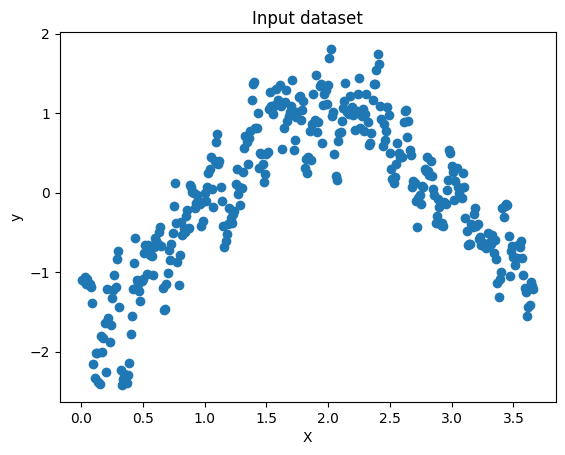

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear3['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear3

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear2['BUDAPEST_temp_mean'].min()

-2.204923068571174

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear2['BUDAPEST_temp_mean'].max()

1.6417097760175523

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (366, 2)
Shape of y: (365, 1)


In [ ]:
X = X[:min(len(X), len(y))]  # Trim X to match y's length
y = y[:min(len(X), len(y))]  # Trim y to match X's length

In [ ]:
compute_cost(X,y)

array([0.50153081])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=400 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [ ]:
theta

array([[-0.53398608],
       [ 0.23081229]])

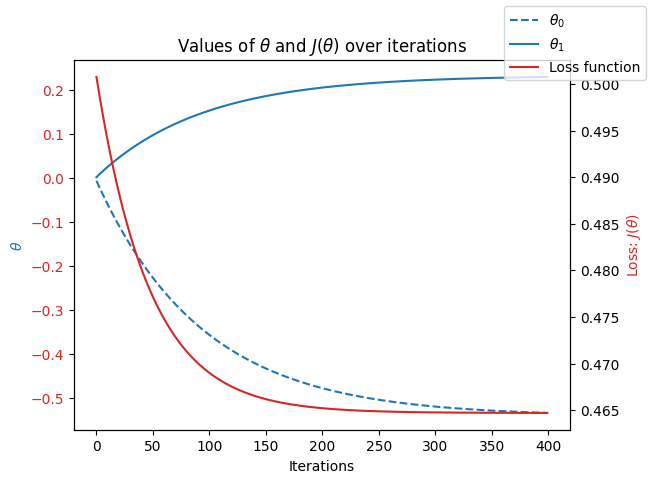

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.27 s, sys: 75.6 ms, total: 3.34 s
Wall time: 3.31 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Budapest 2000 Weather Station<a id='buda3'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear3 = df[df['DATE'].astype(str).str.contains('2000')]
dfyear3

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101 -1.599964        -1.017527           -1.720523   
14611  20000102 -1.599964        -0.922462           -1.572984   
14612  20000103 -1.599964        -1.112591           -1.550286   
14613  20000104 -1.599964        -0.881720           -1.584333   
14614  20000105 -1.599964        -0.596526           -1.527588   
...         ...       ...              ...                 ...   
14971  20001227  1.594371        -0.705172           -0.040850   
14972  20001228  1.594371        -1.058269           -0.108944   
14973  20001229  1.594371        -1.261978           -0.596958   
14974  20001230  1.594371        -1.275559           -0.948781   
14975  20001231  1.594371        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
dfyear3.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.000067e+07    0.001171         0.189334            0.174319   
std    3.457653e+02    1.003590         0.876730            1.017296   
min    2.000010e+07   -1.599964        -2.334850           -2.560360   
25%    2.000040e+07   -0.728781        -0.484486           -0.596958   
50%    2.000070e+07    0.142401         0.191152            0.299625   
75%    2.000098e+07    0.940984         0.910926            0.912479   
max    2.000123e+07    1.594371         1.997379            2.285726   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.111792          0.138324              0.107620   
std              0.989119          0.862365              0.861824   
min             -2.157869         -2.028846             -1.961391   
25%             -0.681562         -0.541556             -0.558680   
50%              0.235983          0.122978              0.107700   
75%              0.888852          0.819156              0.744627   
max              2.088719          2.512135              2.633317   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean           0.143232            0.065189          0.139297   
std            0.810899            0.900700          0.938943   
min           -2.359897           -2.342792         -2.309284   
25%           -0.467220           -0.630607         -0.552067   
50%            0.236139            0.033301          0.134577   
75%            0.821207            0.815141          0.920895   
max            1.809107            2.479279          2.401239   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.176845              0.146490          0.010056   
std               0.951569              0.868501          0.961111   
min              -2.254781             -2.032478         -1.931817   
25%              -0.532276             -0.502167         -0.745657   
50%               0.294164              0.135463         -0.139098   
75%               0.917777              0.829354          0.871834   
max               1.959152              2.513446          1.950161   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean             0.198358        0.165535        0.102767   
std              0.907923        0.806532        1.072996   
min             -2.666111       -2.395118       -2.307581   
25%             -0.476246       -0.429272       -0.842657   
50%              0.224385        0.256347        0.108702   
75%              0.925017        0.817584        1.009546   
max              2.235165        1.633653        2.373441   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.111589             0.143601         0.105552   
std               0.939300             0.814405         0.880330   
min              -2.698347            -2.170075        -2.139837   
25%              -0.541146            -0.537249        -0.539698   
50%               0.197422             0.243397        -0.006319   
75%               0.822644             0.815664         0.868267   
max               1.981683             1.786029         2.284075   

       VALENTIA_temp_mean  
count          366.000000  
mean             0.010196  
std              1.118192  
min             -2.801209  
25%             -0.848468  
50%             -0.067372  
75%              0.954062  
max              2.636423

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear3 = dfyear3.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.67, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [ ]:
n_rows3 = dfyear3.shape[0]
n_rows3

366

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows3, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows3, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear3['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows3, 1)

In [ ]:
dfyear3.shape

(366, 20)

In [ ]:
X.shape, y.shape

((366, 2), (366, 1))

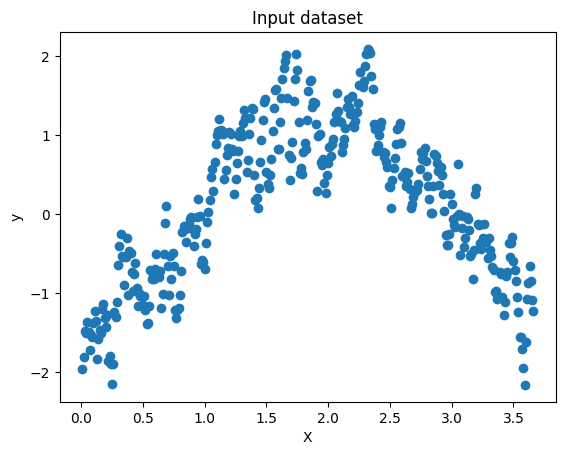

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear3['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear3

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101 -1.599964        -1.017527           -1.720523   
14611  20000102 -1.599964        -0.922462           -1.572984   
14612  20000103 -1.599964        -1.112591           -1.550286   
14613  20000104 -1.599964        -0.881720           -1.584333   
14614  20000105 -1.599964        -0.596526           -1.527588   
...         ...       ...              ...                 ...   
14971  20001227  1.594371        -0.705172           -0.040850   
14972  20001228  1.594371        -1.058269           -0.108944   
14973  20001229  1.594371        -1.261978           -0.596958   
14974  20001230  1.594371        -1.275559           -0.948781   
14975  20001231  1.594371        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear3['BUDAPEST_temp_mean'].min()

-2.1578694557933304

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear3['BUDAPEST_temp_mean'].max()

2.0887190974070684

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.49409008])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.02
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [ ]:
theta

array([[-0.1760912 ],
       [ 0.16625875]])

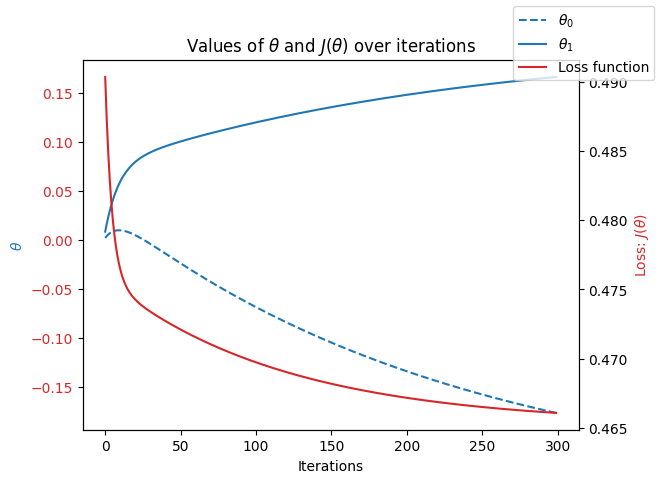

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.16 s, sys: 82.8 ms, total: 3.24 s
Wall time: 3.2 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Basel 1970 Weather Station<a id='basel2'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear4 = df[df['DATE'].astype(str).str.contains('1970')]
dfyear4

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
3653  19700101 -1.599964        -1.900269           -1.380049   
3654  19700102 -1.599964        -1.968172           -1.629730   
3655  19700103 -1.599964        -1.710140           -1.300605   
3656  19700104 -1.599964        -1.520011           -0.926083   
3657  19700105 -1.599964        -1.112591           -0.449419   
...        ...       ...              ...                 ...   
4013  19701227  1.594371        -2.348431           -1.221161   
4014  19701228  1.594371        -2.063237           -0.744497   
4015  19701229  1.594371        -1.968172           -0.267832   
4016  19701230  1.594371        -1.669398           -0.256483   
4017  19701231  1.594371        -2.199044           -0.528863   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
3653           -1.416775         -3.088935             -2.889169   
3654           -1.581463         -1.490890             -1.666859   
3655           -1.934365         -1.617468             -1.475413   
3656           -1.734387         -2.171246             -2.079204   
3657           -1.052110         -1.981379             -1.902485   
...                  ...               ...                   ...   
4013           -2.204923         -2.598446             -2.491550   
4014           -1.216797         -2.044668             -1.902485   
4015           -1.287378         -2.013024             -1.902485   
4016           -0.934476         -1.981379             -2.108658   
4017           -1.216797         -2.361113             -2.491550   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
3653         -3.357388           -1.923481         -2.678447   
3654         -1.809997           -1.626469         -1.895821   
3655         -1.451923           -1.643941         -1.526658   
3656         -1.541442           -2.272906         -1.940121   
3657         -1.464712           -2.430148         -1.733389   
...                ...                 ...               ...   
4013         -1.490288           -2.133136         -2.205918   
4014         -1.298463           -1.906010         -1.689090   
4015         -1.196156           -1.678883         -1.733389   
4016         -1.068273           -1.661412         -1.792455   
4017         -1.937881           -1.958424         -2.560315   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
3653            -1.455587             -2.842642         -1.392653   
3654            -1.673549             -1.792429         -1.810505   
3655            -1.431369             -1.387347         -1.500486   
3656            -1.043881             -1.987469         -0.637824   
3657            -1.019663             -1.852441         -0.732178   
...                   ...                   ...               ...   
4013            -1.782530             -2.422557         -2.107045   
4014            -1.649331             -2.152502         -1.864421   
4015            -1.358715             -2.047481         -2.012691   
4016            -0.971227             -2.137499         -2.053129   
4017            -1.286061             -2.602594         -1.864421   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
3653           -1.798962       -1.254442       -1.179421            -1.528340   
3654           -1.685856       -1.654892       -1.566700            -1.791591   
3655           -1.283700       -1.909724       -1.246774            -1.221213   
3656           -1.459643       -2.358713       -1.027877            -1.060337   
3657           -1.283700       -2.492197       -0.253319            -0.621584   
...                  ...             ...             ...                  ...   
4013           -2.377061       -1.072419       -0.758466            -1.367464   
4014           -1.899501       -0.999610       -0.674275            -1.074962   
4015           -1.635586       -1.400060       -0.371187            -1.118837   
4016

In [ ]:
dfyear4.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   1.970067e+07    0.004762        -0.133779           -0.109784   
std    3.454755e+02    1.002610         1.017559            0.924237   
min    1.970010e+07   -1.599964        -2.348431           -2.026950   
25%    1.970040e+07   -0.728781        -1.003946           -0.835290   
50%    1.970070e+07    0.142401        -0.161945           -0.052199   
75%    1.970100e+07    1.013583         0.652894            0.628750   
max    1.970123e+07    1.594371         1.847992            1.650173   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean            -0.113229         -0.139411             -0.135330   
std              0.996474          1.079347              1.053106   
min             -2.204923         -3.088935             -2.889169   
25%             -0.969766         -0.968756             -0.930527   
50%             -0.099274          0.028044             -0.135289   
75%              0.724164          0.724222              0.718855   
max              1.641710          2.100757              1.838079   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean          -0.172282           -0.086796         -0.045555   
std            1.079882            1.065428          1.125148   
min           -3.459695           -2.430148         -2.678447   
25%           -0.978754           -0.910147         -0.950763   
50%           -0.096358           -0.019113          0.009061   
75%            0.773250            0.802037          0.880287   
max            1.975355            2.234681          2.091142   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.121042             -0.137325         -0.085698   
std               0.991954              1.025780          1.010199   
min              -2.170018             -2.842642         -2.187919   
25%              -0.983336             -0.907249         -0.947843   
50%              -0.147815             -0.112087         -0.233451   
75%               0.699815              0.668071          0.885313   
max               1.813844              1.823306          1.788412   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean            -0.185690       -0.177366       -0.012787   
std              1.013268        1.163289        1.088088   
min             -3.017997       -2.977591       -2.358096   
25%             -1.019785       -1.036014       -0.926848   
50%             -0.165203       -0.198710       -0.185966   
75%              0.664244        0.869157        1.060061   
max              1.833009        2.167587        2.104030   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean             -0.196054            -0.222937        -0.113811   
std               1.053555             1.159896         1.025732   
min              -3.122475            -3.115559        -2.892843   
25%              -0.987211            -1.050423        -0.853451   
50%              -0.138956            -0.291548        -0.131820   
75%               0.665425             0.865426         0.699625   
max               1.908558             1.985078         1.986010   

       VALENTIA_temp_mean  
count          365.000000  
mean            -0.085068  
std              1.212600  
min             -3.011504  
25%             -0.998679  
50%              0.052797  
75%              0.954062  
max              2.426128

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear4 = dfyear4.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.66, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [ ]:
n_rows4 = dfyear4.shape[0]
n_rows4

365

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows4, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows4, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear4['BASEL_temp_mean'].to_numpy().reshape(n_rows4, 1)

In [ ]:
dfyear4.shape

(365, 20)

In [ ]:
X.shape, y.shape

((365, 2), (365, 1))

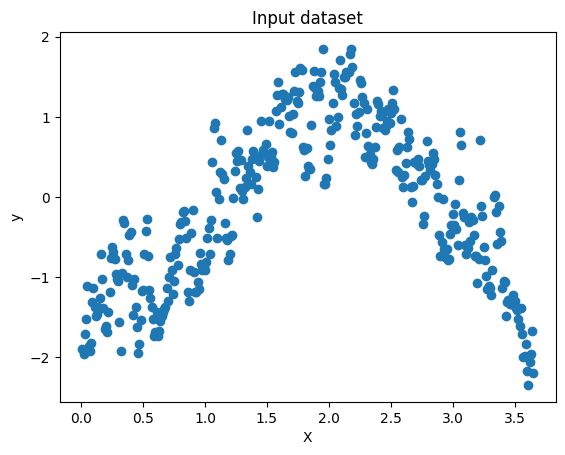

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear4['BASEL_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear4

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
3653  19700101 -1.599964        -1.900269           -1.380049   
3654  19700102 -1.599964        -1.968172           -1.629730   
3655  19700103 -1.599964        -1.710140           -1.300605   
3656  19700104 -1.599964        -1.520011           -0.926083   
3657  19700105 -1.599964        -1.112591           -0.449419   
...        ...       ...              ...                 ...   
4013  19701227  1.594371        -2.348431           -1.221161   
4014  19701228  1.594371        -2.063237           -0.744497   
4015  19701229  1.594371        -1.968172           -0.267832   
4016  19701230  1.594371        -1.669398           -0.256483   
4017  19701231  1.594371        -2.199044           -0.528863   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
3653           -1.416775         -3.088935             -2.889169   
3654           -1.581463         -1.490890             -1.666859   
3655           -1.934365         -1.617468             -1.475413   
3656           -1.734387         -2.171246             -2.079204   
3657           -1.052110         -1.981379             -1.902485   
...                  ...               ...                   ...   
4013           -2.204923         -2.598446             -2.491550   
4014           -1.216797         -2.044668             -1.902485   
4015           -1.287378         -2.013024             -1.902485   
4016           -0.934476         -1.981379             -2.108658   
4017           -1.216797         -2.361113             -2.491550   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
3653         -3.357388           -1.923481         -2.678447   
3654         -1.809997           -1.626469         -1.895821   
3655         -1.451923           -1.643941         -1.526658   
3656         -1.541442           -2.272906         -1.940121   
3657         -1.464712           -2.430148         -1.733389   
...                ...                 ...               ...   
4013         -1.490288           -2.133136         -2.205918   
4014         -1.298463           -1.906010         -1.689090   
4015         -1.196156           -1.678883         -1.733389   
4016         -1.068273           -1.661412         -1.792455   
4017         -1.937881           -1.958424         -2.560315   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
3653            -1.455587             -2.842642         -1.392653   
3654            -1.673549             -1.792429         -1.810505   
3655            -1.431369             -1.387347         -1.500486   
3656            -1.043881             -1.987469         -0.637824   
3657            -1.019663             -1.852441         -0.732178   
...                   ...                   ...               ...   
4013            -1.782530             -2.422557         -2.107045   
4014            -1.649331             -2.152502         -1.864421   
4015            -1.358715             -2.047481         -2.012691   
4016            -0.971227             -2.137499         -2.053129   
4017            -1.286061             -2.602594         -1.864421   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
3653           -1.798962       -1.254442       -1.179421            -1.528340   
3654           -1.685856       -1.654892       -1.566700            -1.791591   
3655           -1.283700       -1.909724       -1.246774            -1.221213   
3656           -1.459643       -2.358713       -1.027877            -1.060337   
3657           -1.283700       -2.492197       -0.253319            -0.621584   
...                  ...             ...             ...                  ...   
4013           -2.377061       -1.072419       -0.758466            -1.367464   
4014           -1.899501       -0.999610       -0.674275            -1.074962   
4015           -1.635586       -1.400060       -0.371187            -1.118837   
4016

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear4['BASEL_temp_mean'].min()

-2.348430817922889

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear4['BASEL_temp_mean'].max()

1.8479916599147743

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.5252432])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [ ]:
theta

array([[-0.47948036],
       [ 0.19125928]])

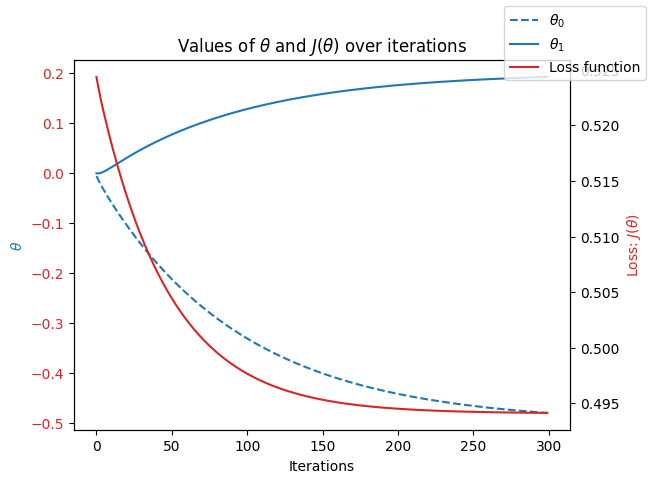

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 4.34 s, sys: 64.4 ms, total: 4.4 s
Wall time: 4.52 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Basel 2000 Weather Station<a id='basel3'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear5 = df[df['DATE'].astype(str).str.contains('2000')]
dfyear5

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101 -1.599964        -1.017527           -1.720523   
14611  20000102 -1.599964        -0.922462           -1.572984   
14612  20000103 -1.599964        -1.112591           -1.550286   
14613  20000104 -1.599964        -0.881720           -1.584333   
14614  20000105 -1.599964        -0.596526           -1.527588   
...         ...       ...              ...                 ...   
14971  20001227  1.594371        -0.705172           -0.040850   
14972  20001228  1.594371        -1.058269           -0.108944   
14973  20001229  1.594371        -1.261978           -0.596958   
14974  20001230  1.594371        -1.275559           -0.948781   
14975  20001231  1.594371        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
dfyear5.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.000067e+07    0.001171         0.189334            0.174319   
std    3.457653e+02    1.003590         0.876730            1.017296   
min    2.000010e+07   -1.599964        -2.334850           -2.560360   
25%    2.000040e+07   -0.728781        -0.484486           -0.596958   
50%    2.000070e+07    0.142401         0.191152            0.299625   
75%    2.000098e+07    0.940984         0.910926            0.912479   
max    2.000123e+07    1.594371         1.997379            2.285726   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.111792          0.138324              0.107620   
std              0.989119          0.862365              0.861824   
min             -2.157869         -2.028846             -1.961391   
25%             -0.681562         -0.541556             -0.558680   
50%              0.235983          0.122978              0.107700   
75%              0.888852          0.819156              0.744627   
max              2.088719          2.512135              2.633317   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean           0.143232            0.065189          0.139297   
std            0.810899            0.900700          0.938943   
min           -2.359897           -2.342792         -2.309284   
25%           -0.467220           -0.630607         -0.552067   
50%            0.236139            0.033301          0.134577   
75%            0.821207            0.815141          0.920895   
max            1.809107            2.479279          2.401239   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.176845              0.146490          0.010056   
std               0.951569              0.868501          0.961111   
min              -2.254781             -2.032478         -1.931817   
25%              -0.532276             -0.502167         -0.745657   
50%               0.294164              0.135463         -0.139098   
75%               0.917777              0.829354          0.871834   
max               1.959152              2.513446          1.950161   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean             0.198358        0.165535        0.102767   
std              0.907923        0.806532        1.072996   
min             -2.666111       -2.395118       -2.307581   
25%             -0.476246       -0.429272       -0.842657   
50%              0.224385        0.256347        0.108702   
75%              0.925017        0.817584        1.009546   
max              2.235165        1.633653        2.373441   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.111589             0.143601         0.105552   
std               0.939300             0.814405         0.880330   
min              -2.698347            -2.170075        -2.139837   
25%              -0.541146            -0.537249        -0.539698   
50%               0.197422             0.243397        -0.006319   
75%               0.822644             0.815664         0.868267   
max               1.981683             1.786029         2.284075   

       VALENTIA_temp_mean  
count          366.000000  
mean             0.010196  
std              1.118192  
min             -2.801209  
25%             -0.848468  
50%             -0.067372  
75%              0.954062  
max              2.636423

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear5 = dfyear5.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.67, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [ ]:
n_rows5 = dfyear5.shape[0]
n_rows5

366

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows5, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows5, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear5['BASEL_temp_mean'].to_numpy().reshape(n_rows5, 1)

In [ ]:
dfyear5.shape

(366, 20)

In [ ]:
X.shape, y.shape

((366, 2), (366, 1))

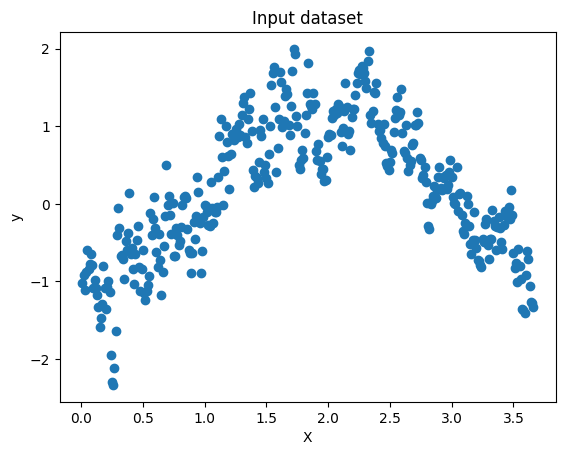

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear3['BASEL_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear5

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101 -1.599964        -1.017527           -1.720523   
14611  20000102 -1.599964        -0.922462           -1.572984   
14612  20000103 -1.599964        -1.112591           -1.550286   
14613  20000104 -1.599964        -0.881720           -1.584333   
14614  20000105 -1.599964        -0.596526           -1.527588   
...         ...       ...              ...                 ...   
14971  20001227  1.594371        -0.705172           -0.040850   
14972  20001228  1.594371        -1.058269           -0.108944   
14973  20001229  1.594371        -1.261978           -0.596958   
14974  20001230  1.594371        -1.275559           -0.948781   
14975  20001231  1.594371        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear5['BASEL_temp_mean'].min()

-2.334850162654805

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear5['BASEL_temp_mean'].max()

1.9973788678636883

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.40120165])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=200 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.025
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [ ]:
theta

array([[-0.08501565],
       [ 0.15737199]])

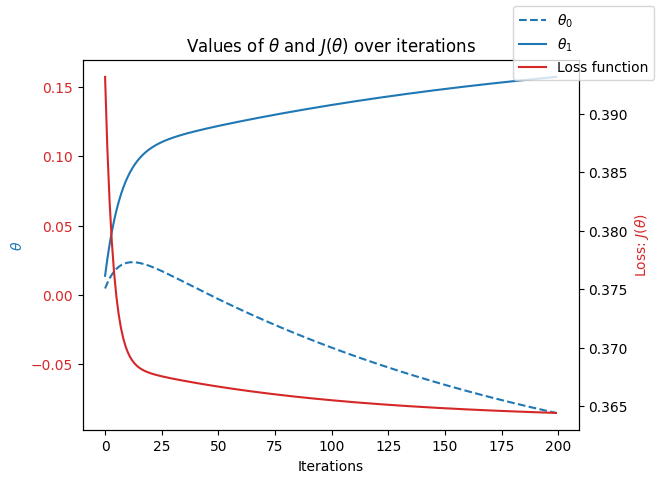

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.25 s, sys: 71.5 ms, total: 3.32 s
Wall time: 3.29 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Heathrow 1960 Weather Station<a id='heathrow1'></a>




In [ ]:
#Reduce your dataset to a single year
dfyear6 = df[df['DATE'].astype(str).str.contains('1960')]
dfyear6

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [ ]:
dfyear6.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    0.001171        -0.102317           -0.032384   
std    3.457653e+02    1.003590         0.935826            0.920271   
min    1.960010e+07   -1.599964        -3.190431           -2.401472   
25%    1.960040e+07   -0.728781        -0.756099           -0.594120   
50%    1.960070e+07    0.142401        -0.053300            0.055618   
75%    1.960098e+07    0.940984         0.649499            0.662798   
max    1.960123e+07    1.594371         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear6 = dfyear6.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.67, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [ ]:
n_rows6 = dfyear6.shape[0]
n_rows6

366

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows6, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows6, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear6['HEATHROW_temp_mean'].to_numpy().reshape(n_rows6, 1)

In [ ]:
dfyear6.shape

(366, 20)

In [ ]:
X.shape, y.shape

((366, 2), (366, 1))

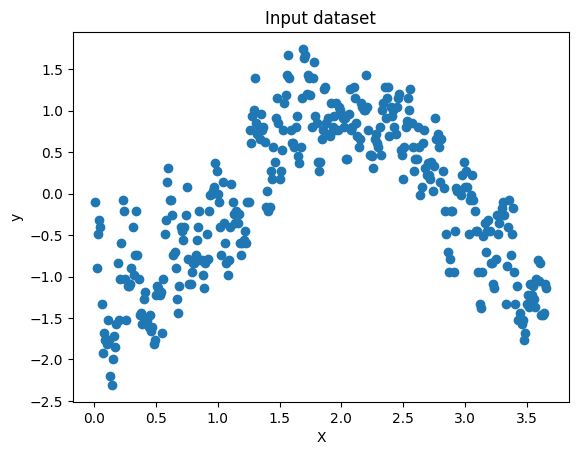

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear6['HEATHROW_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear6

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear6['HEATHROW_temp_mean'].min()

-2.307849033037666

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear6['HEATHROW_temp_mean'].max()

1.7454857532917796

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.42664811])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=350 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.48 µs


In [ ]:
theta

array([[-0.40006377],
       [ 0.16281903]])

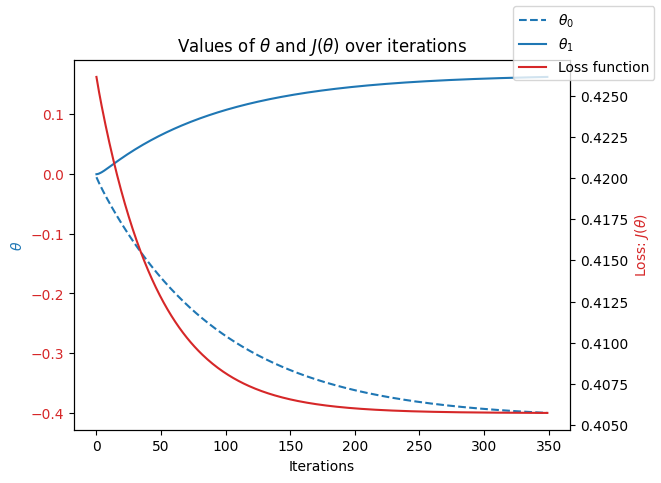

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 4.44 s, sys: 56.2 ms, total: 4.49 s
Wall time: 4.64 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Heathrow 1970 Weather Station<a id='heathrow2'></a>

In [ ]:
#Reduce your dataset to a single year
dfyear7 = df[df['DATE'].astype(str).str.contains('1970')]
dfyear7

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
3653  19700101 -1.599964        -1.900269           -1.380049   
3654  19700102 -1.599964        -1.968172           -1.629730   
3655  19700103 -1.599964        -1.710140           -1.300605   
3656  19700104 -1.599964        -1.520011           -0.926083   
3657  19700105 -1.599964        -1.112591           -0.449419   
...        ...       ...              ...                 ...   
4013  19701227  1.594371        -2.348431           -1.221161   
4014  19701228  1.594371        -2.063237           -0.744497   
4015  19701229  1.594371        -1.968172           -0.267832   
4016  19701230  1.594371        -1.669398           -0.256483   
4017  19701231  1.594371        -2.199044           -0.528863   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
3653           -1.416775         -3.088935             -2.889169   
3654           -1.581463         -1.490890             -1.666859   
3655           -1.934365         -1.617468             -1.475413   
3656           -1.734387         -2.171246             -2.079204   
3657           -1.052110         -1.981379             -1.902485   
...                  ...               ...                   ...   
4013           -2.204923         -2.598446             -2.491550   
4014           -1.216797         -2.044668             -1.902485   
4015           -1.287378         -2.013024             -1.902485   
4016           -0.934476         -1.981379             -2.108658   
4017           -1.216797         -2.361113             -2.491550   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
3653         -3.357388           -1.923481         -2.678447   
3654         -1.809997           -1.626469         -1.895821   
3655         -1.451923           -1.643941         -1.526658   
3656         -1.541442           -2.272906         -1.940121   
3657         -1.464712           -2.430148         -1.733389   
...                ...                 ...               ...   
4013         -1.490288           -2.133136         -2.205918   
4014         -1.298463           -1.906010         -1.689090   
4015         -1.196156           -1.678883         -1.733389   
4016         -1.068273           -1.661412         -1.792455   
4017         -1.937881           -1.958424         -2.560315   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
3653            -1.455587             -2.842642         -1.392653   
3654            -1.673549             -1.792429         -1.810505   
3655            -1.431369             -1.387347         -1.500486   
3656            -1.043881             -1.987469         -0.637824   
3657            -1.019663             -1.852441         -0.732178   
...                   ...                   ...               ...   
4013            -1.782530             -2.422557         -2.107045   
4014            -1.649331             -2.152502         -1.864421   
4015            -1.358715             -2.047481         -2.012691   
4016            -0.971227             -2.137499         -2.053129   
4017            -1.286061             -2.602594         -1.864421   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
3653           -1.798962       -1.254442       -1.179421            -1.528340   
3654           -1.685856       -1.654892       -1.566700            -1.791591   
3655           -1.283700       -1.909724       -1.246774            -1.221213   
3656           -1.459643       -2.358713       -1.027877            -1.060337   
3657           -1.283700       -2.492197       -0.253319            -0.621584   
...                  ...             ...             ...                  ...   
4013           -2.377061       -1.072419       -0.758466            -1.367464   
4014           -1.899501       -0.999610       -0.674275            -1.074962   
4015           -1.635586       -1.400060       -0.371187            -1.118837   
4016

In [ ]:
dfyear7.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.650000e+02  365.000000       365.000000          365.000000   
mean   1.970067e+07    0.004762        -0.133779           -0.109784   
std    3.454755e+02    1.002610         1.017559            0.924237   
min    1.970010e+07   -1.599964        -2.348431           -2.026950   
25%    1.970040e+07   -0.728781        -1.003946           -0.835290   
50%    1.970070e+07    0.142401        -0.161945           -0.052199   
75%    1.970100e+07    1.013583         0.652894            0.628750   
max    1.970123e+07    1.594371         1.847992            1.650173   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          365.000000        365.000000            365.000000   
mean            -0.113229         -0.139411             -0.135330   
std              0.996474          1.079347              1.053106   
min             -2.204923         -3.088935             -2.889169   
25%             -0.969766         -0.968756             -0.930527   
50%             -0.099274          0.028044             -0.135289   
75%              0.724164          0.724222              0.718855   
max              1.641710          2.100757              1.838079   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        365.000000          365.000000        365.000000   
mean          -0.172282           -0.086796         -0.045555   
std            1.079882            1.065428          1.125148   
min           -3.459695           -2.430148         -2.678447   
25%           -0.978754           -0.910147         -0.950763   
50%           -0.096358           -0.019113          0.009061   
75%            0.773250            0.802037          0.880287   
max            1.975355            2.234681          2.091142   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           365.000000            365.000000        365.000000   
mean             -0.121042             -0.137325         -0.085698   
std               0.991954              1.025780          1.010199   
min              -2.170018             -2.842642         -2.187919   
25%              -0.983336             -0.907249         -0.947843   
50%              -0.147815             -0.112087         -0.233451   
75%               0.699815              0.668071          0.885313   
max               1.813844              1.823306          1.788412   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          365.000000      365.000000      365.000000   
mean            -0.185690       -0.177366       -0.012787   
std              1.013268        1.163289        1.088088   
min             -3.017997       -2.977591       -2.358096   
25%             -1.019785       -1.036014       -0.926848   
50%             -0.165203       -0.198710       -0.185966   
75%              0.664244        0.869157        1.060061   
max              1.833009        2.167587        2.104030   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           365.000000           365.000000       365.000000   
mean             -0.196054            -0.222937        -0.113811   
std               1.053555             1.159896         1.025732   
min              -3.122475            -3.115559        -2.892843   
25%              -0.987211            -1.050423        -0.853451   
50%              -0.138956            -0.291548        -0.131820   
75%               0.665425             0.865426         0.699625   
max               1.908558             1.985078         1.986010   

       VALENTIA_temp_mean  
count          365.000000  
mean            -0.085068  
std              1.212600  
min             -3.011504  
25%             -0.998679  
50%              0.052797  
75%              0.954062  
max              2.426128

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear7 = dfyear7.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.66, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [ ]:
n_rows7 = dfyear7.shape[0]
n_rows7

365

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows7, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows7, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear4['HEATHROW_temp_mean'].to_numpy().reshape(n_rows7, 1)

In [ ]:
dfyear7.shape

(365, 20)

In [ ]:
X.shape, y.shape

((365, 2), (365, 1))

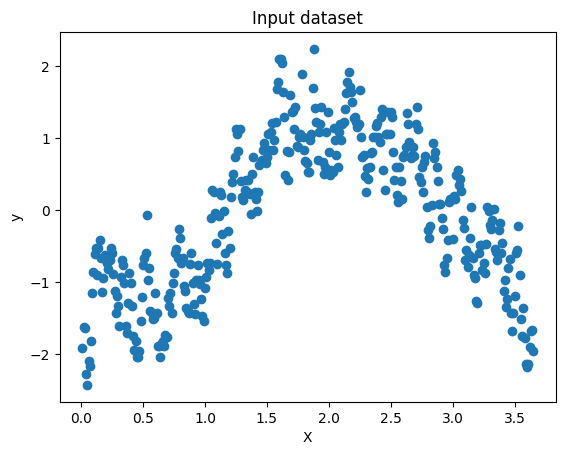

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear7['HEATHROW_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear7

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
3653  19700101 -1.599964        -1.900269           -1.380049   
3654  19700102 -1.599964        -1.968172           -1.629730   
3655  19700103 -1.599964        -1.710140           -1.300605   
3656  19700104 -1.599964        -1.520011           -0.926083   
3657  19700105 -1.599964        -1.112591           -0.449419   
...        ...       ...              ...                 ...   
4013  19701227  1.594371        -2.348431           -1.221161   
4014  19701228  1.594371        -2.063237           -0.744497   
4015  19701229  1.594371        -1.968172           -0.267832   
4016  19701230  1.594371        -1.669398           -0.256483   
4017  19701231  1.594371        -2.199044           -0.528863   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
3653           -1.416775         -3.088935             -2.889169   
3654           -1.581463         -1.490890             -1.666859   
3655           -1.934365         -1.617468             -1.475413   
3656           -1.734387         -2.171246             -2.079204   
3657           -1.052110         -1.981379             -1.902485   
...                  ...               ...                   ...   
4013           -2.204923         -2.598446             -2.491550   
4014           -1.216797         -2.044668             -1.902485   
4015           -1.287378         -2.013024             -1.902485   
4016           -0.934476         -1.981379             -2.108658   
4017           -1.216797         -2.361113             -2.491550   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
3653         -3.357388           -1.923481         -2.678447   
3654         -1.809997           -1.626469         -1.895821   
3655         -1.451923           -1.643941         -1.526658   
3656         -1.541442           -2.272906         -1.940121   
3657         -1.464712           -2.430148         -1.733389   
...                ...                 ...               ...   
4013         -1.490288           -2.133136         -2.205918   
4014         -1.298463           -1.906010         -1.689090   
4015         -1.196156           -1.678883         -1.733389   
4016         -1.068273           -1.661412         -1.792455   
4017         -1.937881           -1.958424         -2.560315   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
3653            -1.455587             -2.842642         -1.392653   
3654            -1.673549             -1.792429         -1.810505   
3655            -1.431369             -1.387347         -1.500486   
3656            -1.043881             -1.987469         -0.637824   
3657            -1.019663             -1.852441         -0.732178   
...                   ...                   ...               ...   
4013            -1.782530             -2.422557         -2.107045   
4014            -1.649331             -2.152502         -1.864421   
4015            -1.358715             -2.047481         -2.012691   
4016            -0.971227             -2.137499         -2.053129   
4017            -1.286061             -2.602594         -1.864421   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
3653           -1.798962       -1.254442       -1.179421            -1.528340   
3654           -1.685856       -1.654892       -1.566700            -1.791591   
3655           -1.283700       -1.909724       -1.246774            -1.221213   
3656           -1.459643       -2.358713       -1.027877            -1.060337   
3657           -1.283700       -2.492197       -0.253319            -0.621584   
...                  ...             ...             ...                  ...   
4013           -2.377061       -1.072419       -0.758466            -1.367464   
4014           -1.899501       -0.999610       -0.674275            -1.074962   
4015           -1.635586       -1.400060       -0.371187            -1.118837   
4016

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear7['HEATHROW_temp_mean'].min()

-2.430147927452779

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear4['HEATHROW_temp_mean'].max()

2.23468133095223

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.56978027])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=350 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [ ]:
theta

array([[-0.57995371],
       [ 0.27116895]])

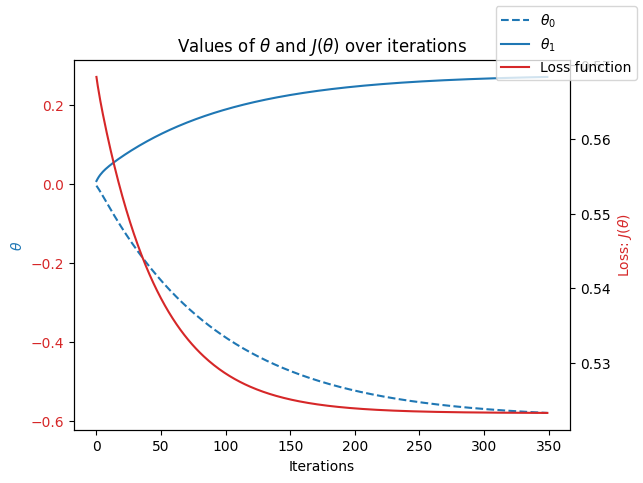

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.38 s, sys: 90.7 ms, total: 3.47 s
Wall time: 3.46 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()

# Heathrow 2000 Weather Station<a id='heathrow3'></a>


In [ ]:
#Reduce your dataset to a single year
dfyear8 = df[df['DATE'].astype(str).str.contains('2000')]
dfyear8

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101 -1.599964        -1.017527           -1.720523   
14611  20000102 -1.599964        -0.922462           -1.572984   
14612  20000103 -1.599964        -1.112591           -1.550286   
14613  20000104 -1.599964        -0.881720           -1.584333   
14614  20000105 -1.599964        -0.596526           -1.527588   
...         ...       ...              ...                 ...   
14971  20001227  1.594371        -0.705172           -0.040850   
14972  20001228  1.594371        -1.058269           -0.108944   
14973  20001229  1.594371        -1.261978           -0.596958   
14974  20001230  1.594371        -1.275559           -0.948781   
14975  20001231  1.594371        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
dfyear8.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.000067e+07    0.001171         0.189334            0.174319   
std    3.457653e+02    1.003590         0.876730            1.017296   
min    2.000010e+07   -1.599964        -2.334850           -2.560360   
25%    2.000040e+07   -0.728781        -0.484486           -0.596958   
50%    2.000070e+07    0.142401         0.191152            0.299625   
75%    2.000098e+07    0.940984         0.910926            0.912479   
max    2.000123e+07    1.594371         1.997379            2.285726   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.111792          0.138324              0.107620   
std              0.989119          0.862365              0.861824   
min             -2.157869         -2.028846             -1.961391   
25%             -0.681562         -0.541556             -0.558680   
50%              0.235983          0.122978              0.107700   
75%              0.888852          0.819156              0.744627   
max              2.088719          2.512135              2.633317   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean           0.143232            0.065189          0.139297   
std            0.810899            0.900700          0.938943   
min           -2.359897           -2.342792         -2.309284   
25%           -0.467220           -0.630607         -0.552067   
50%            0.236139            0.033301          0.134577   
75%            0.821207            0.815141          0.920895   
max            1.809107            2.479279          2.401239   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean              0.176845              0.146490          0.010056   
std               0.951569              0.868501          0.961111   
min              -2.254781             -2.032478         -1.931817   
25%              -0.532276             -0.502167         -0.745657   
50%               0.294164              0.135463         -0.139098   
75%               0.917777              0.829354          0.871834   
max               1.959152              2.513446          1.950161   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean             0.198358        0.165535        0.102767   
std              0.907923        0.806532        1.072996   
min             -2.666111       -2.395118       -2.307581   
25%             -0.476246       -0.429272       -0.842657   
50%              0.224385        0.256347        0.108702   
75%              0.925017        0.817584        1.009546   
max              2.235165        1.633653        2.373441   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean              0.111589             0.143601         0.105552   
std               0.939300             0.814405         0.880330   
min              -2.698347            -2.170075        -2.139837   
25%              -0.541146            -0.537249        -0.539698   
50%               0.197422             0.243397        -0.006319   
75%               0.822644             0.815664         0.868267   
max               1.981683             1.786029         2.284075   

       VALENTIA_temp_mean  
count          366.000000  
mean             0.010196  
std              1.118192  
min             -2.801209  
25%             -0.848468  
50%             -0.067372  
75%              0.954062  
max              2.636423

In [ ]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear8 = dfyear8.drop(['DATE','MONTH'], axis=1)

In [ ]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01, 3.67, 0.01)  #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [ ]:
n_rows8 = dfyear8.shape[0]
n_rows8

366

In [ ]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X = index.to_numpy().reshape(n_rows8, 1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows8, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear8['HEATHROW_temp_mean'].to_numpy().reshape(n_rows8, 1)

In [ ]:
dfyear8.shape

(366, 20)

In [ ]:
X.shape, y.shape

((366, 2), (366, 1))

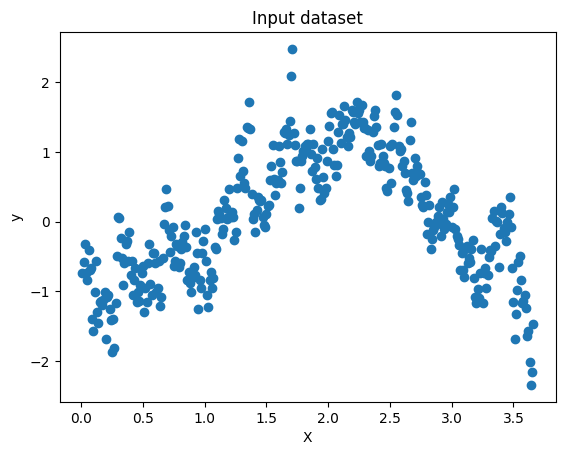

In [ ]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear8['HEATHROW_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

In [ ]:
dfyear8

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101 -1.599964        -1.017527           -1.720523   
14611  20000102 -1.599964        -0.922462           -1.572984   
14612  20000103 -1.599964        -1.112591           -1.550286   
14613  20000104 -1.599964        -0.881720           -1.584333   
14614  20000105 -1.599964        -0.596526           -1.527588   
...         ...       ...              ...                 ...   
14971  20001227  1.594371        -0.705172           -0.040850   
14972  20001228  1.594371        -1.058269           -0.108944   
14973  20001229  1.594371        -1.261978           -0.596958   
14974  20001230  1.594371        -1.275559           -0.948781   
14975  20001231  1.594371        -1.329882           -1.209812   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   
...                   ...               ...                   ...   
14971           -0.863895         -1.744046             -1.372326   
14972           -0.652154         -1.506712             -1.416506   
14973           -0.840368         -1.490890             -1.534319   
14974           -1.087400         -1.316845             -1.387053   
14975           -1.228561         -1.601646             -1.401779   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   
...                 ...                 ...               ...   
14971         -1.247310           -1.574056         -1.142728   
14972         -1.119426           -2.010837         -1.201794   
14973         -1.170580           -2.342792         -1.570958   
14974         -1.413558           -2.150608         -1.319926   
14975         -0.902024           -1.469228         -1.467592   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   
...                    ...                   ...               ...   
14971            -0.523194             -1.537377         -1.096113   
14972            -0.523194             -1.402350         -1.284820   
14973            -0.934900             -1.492368         -0.853490   
14974            -1.104426             -1.432356         -1.069155   
14975            -1.358715             -1.342338         -1.365695   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   
...                   ...             ...             ...   
14971           -1.032352       -1.169498       -0.388025   
14972           -0.931813       -1.205902       -0.691113   
14973           -1.220863       -1.302981       -0.825818   
14974           -1.183161       -1.667027       -1.330965   
14975           -1.472210       -2.395118       -0.994201   

       SONNBLICK_temp_mean  STOCKH

In [ ]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear8['HEATHROW_temp_mean'].min()

-2.342791574299127

In [ ]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear8['HEATHROW_temp_mean'].max()

2.479279119782455

In [ ]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""

    m = len(y)
    J=0 # initialize loss to zero

    # reshape theta
    theta=theta.reshape(2,1)

    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)

    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)

    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)

    return loss

In [ ]:
compute_cost(X,y)

array([0.40664686])

In [ ]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique.
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)

    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)

        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))

        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)

        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])

    return (theta, J_history, theta0_history, theta1_history)

In [ ]:
%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[0]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05
#<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:
theta

array([[-0.24564283],
       [ 0.17072039]])

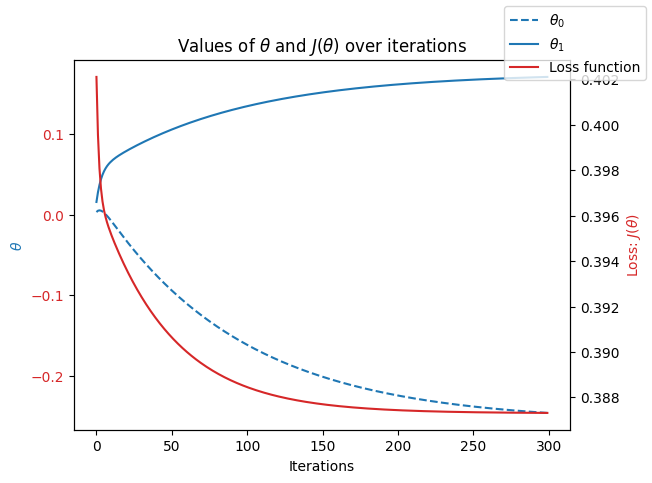

In [ ]:

#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
# Display the plot with the legend
plt.show()

In [ ]:
%%time
# theta range
theta0_vals = np.linspace(0.2,-0.02,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(0,0.15,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: user 3.47 s, sys: 97.5 ms, total: 3.57 s
Wall time: 3.64 s


In [ ]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0',
                 yaxis_title='theta1')
fig.show()